In [11]:
%matplotlib inline
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt

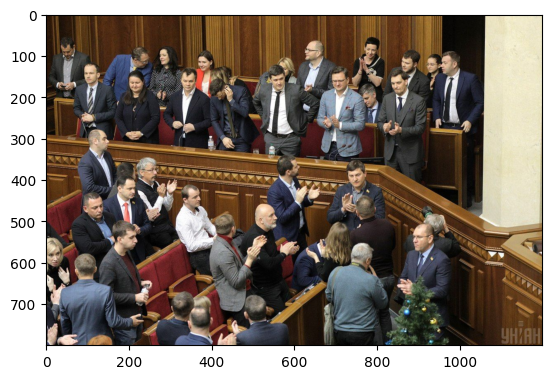

In [12]:
im = cv2.imread('img3.jpg')
# im = cv2.imread('img4.png')
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

Haar faces: 20


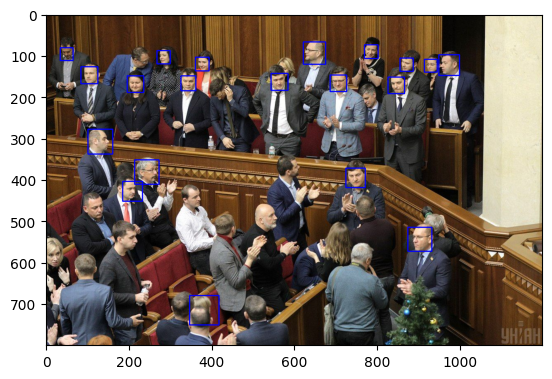

In [13]:
faceCascade = cv2.CascadeClassifier("../models/haarcascade_frontalface_default.xml")
img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(img)

imo = im.copy()

for (x, y, w, h) in faces:
    cv2.rectangle(imo, (x,y),(x+w,y+h),(255,0,0), 2)
    
print(f"Haar faces: {len(faces)}")    
plt.imshow(cv2.cvtColor(imo, cv2.COLOR_BGR2RGB));
cv2.imwrite('imo_f1.jpg', imo);

DNN faces: 12


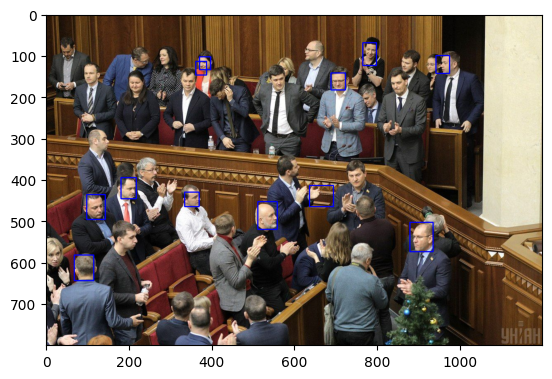

In [14]:
conf_threshold = 0.14
net = cv2.dnn.readNetFromCaffe("../models/deploy.prototxt", "../models/res10_300x300_ssd_iter_140000_fp16.caffemodel")
#net = cv2.dnn.readNetFromTensorflow("../models/opencv_face_detector_uint8.pb", "../models/opencv_face_detector.pbtxt")
net.setPreferableBackend(cv2.dnn.DNN_TARGET_CPU)

# imi = im.copy()
imi = cv2.resize(im, (300, 300))
imo = im.copy()

h, w, d = im.shape
#print(imi)
blob = cv2.dnn.blobFromImage(imi, 1.0, (300, 300), [104, 117, 123], False, False,)
#print(blob)

net.setInput(blob)

detections = net.forward()
c = 0
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > conf_threshold:
        x1 = int(detections[0, 0, i, 3] * w)
        y1 = int(detections[0, 0, i, 4] * h)
        x2 = int(detections[0, 0, i, 5] * w)
        y2 = int(detections[0, 0, i, 6] * h)
    
        cv2.rectangle(imo, (x1,y1),(x2,y2),(255,0,0), 2)
        c+=1
    
print(f"DNN faces: {c}")    
plt.imshow(cv2.cvtColor(imo, cv2.COLOR_BGR2RGB));
cv2.imwrite('imo_f2.jpg', imo);

DLIB FFD: 0


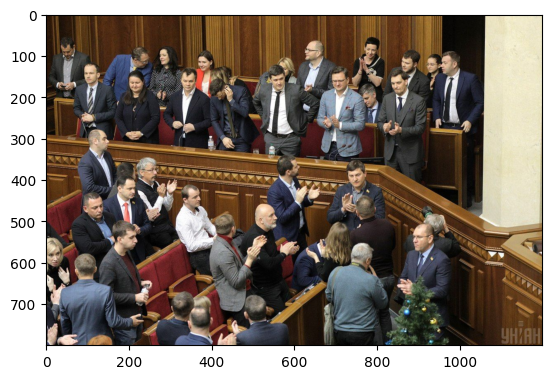

In [15]:
hogFaceDetector = dlib.get_frontal_face_detector()

imi = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
imo = im.copy()

faceRects = hogFaceDetector(imi, 0)

for r in faceRects:
    cv2.rectangle(imo, (r.left(), r.top()),(r.right(),r.bottom()),(255,0,0), 2)
    
print(f"DLIB FFD: {len(faceRects)}")    
plt.imshow(cv2.cvtColor(imo, cv2.COLOR_BGR2RGB));
cv2.imwrite('imo_f3.jpg', imo);

DLIB MMOD: 0


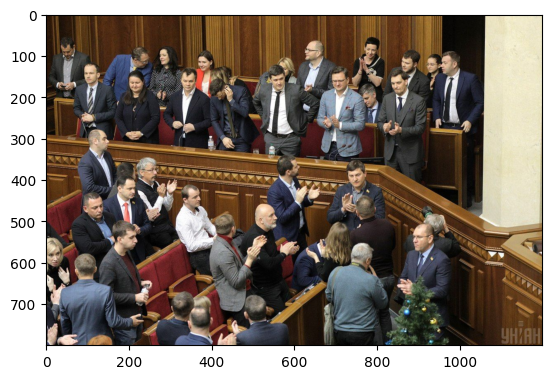

In [16]:
mmodFaceDetector = dlib.cnn_face_detection_model_v1("../models/mmod_human_face_detector.dat",)

# imi = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
h,w,d = im.shape
th,tw = 300, 300
sh, sw = th/h, tw/w

imi = cv2.cvtColor(cv2.resize(im, (th,tw)), cv2.COLOR_BGR2RGB)
imo = im.copy()

faceRects = mmodFaceDetector(imi, 0)

for r1 in faceRects:
    r = r1.rect
    
    x1 = int(r.left() * sw)
    x2 = int(r.right() * sw)
    y1 = int(r.top() * sh)
    y2 = int(r.bottom() * sh)
    
    cv2.rectangle(imo, (x1,y1), (x2,y2), (255,0,0), 2)
    
print(f"DLIB MMOD: {len(faceRects)}")    
plt.imshow(cv2.cvtColor(imo, cv2.COLOR_BGR2RGB));
cv2.imwrite('imo_f4.jpg', imo);